**Machine Learning with IBM Minor**

Multi Linear Regression Model

In [1]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataframe
start_up=pd.read_csv("/content/50_Startups.csv")
start_up

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
#getting the information about the dataframe
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#to know if there are any null values
start_up.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#names of the coloums
start_up.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
#Statistical Details of the dataset
start_up.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.00000,50.000000
mean,74325.400000,121344.639600,224982.96840,112012.639200
std,45084.581418,28017.802755,110436.87914,40306.180338
min,542.050000,51283.140000,1903.93000,14681.400000
25%,39936.370000,103730.875000,142431.38500,90138.902500
50%,73051.080000,122699.795000,221897.88000,107978.190000
75%,101602.800000,144842.180000,299737.29000,139765.977500
max,165349.200000,182645.560000,471784.10000,192261.830000


In [7]:
#dropping the State coloum and creating new dataframe
startup_df=start_up.drop(["State"],axis=1)
startup_df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
#selecting only numeric values from dataframe 
s_numeric=start_up.select_dtypes(include=["int64","float64"])
s_numeric

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [9]:
#information about numeric dataframe
s_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [10]:
#define x as input
x=s_numeric.iloc[:,0:3].values
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11, 299737.29],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [11]:
#define y as output
y=s_numeric.iloc[:,3].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [12]:
#shape of x
x.shape

(50, 3)

In [13]:
#shape of y
y.shape

(50,)

In [14]:
#splitting dataset for traing and testing using sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
x_train.shape

(37, 3)

In [16]:
y_train.shape

(37,)

In [17]:
x_test.shape

(13, 3)

In [18]:
x_test.size

39

In [19]:
y_test.shape

(13,)

In [20]:
#importing linearregression using sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [21]:
#fitting the train data into model
model.fit(x_train,y_train)

LinearRegression()

In [22]:
#predicting the output
y_pred=model.predict(x_test)
y_pred

array([102917.21128549, 132907.4050721 , 133821.9861075 ,  70646.3050185 ,
       179877.84570157, 111519.63216554,  64388.81509027,  97862.76031993,
       112105.38910821, 169539.56700038,  94801.43801022,  86492.66405778,
       110403.22479022])

In [23]:
#actual putput
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54])

In [24]:
#finding accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9342448347743686

In [25]:
#creating new dataframe of actual output, predicted output and difference
pred_df=pd.DataFrame({"actual output": y_test,"predicted output":y_pred,"differece":y_test-y_pred})
pred_df

,actual output,predicted output,differece
0,103282.38,102917.211285,365.168715
1,144259.40,132907.405072,11351.994928
2,146121.95,133821.986107,12299.963893
3,77798.83,70646.305018,7152.524982
4,191050.39,179877.845702,11172.544298
5,105008.31,111519.632166,-6511.322166
6,81229.06,64388.815090,16840.244910
7,97483.56,97862.760320,-379.200320
8,110352.25,112105.389108,-1753.139108
9,166187.94,169539.567000,-3351.627000


In [26]:
#finding the correlation between coloumns in the dataset
startup_df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.252757,0.708327,0.966520
Administration,0.252757,1.000000,-0.043776,0.200717
Marketing Spend,0.708327,-0.043776,1.000000,0.709814
Profit,0.966520,0.200717,0.709814,1.000000


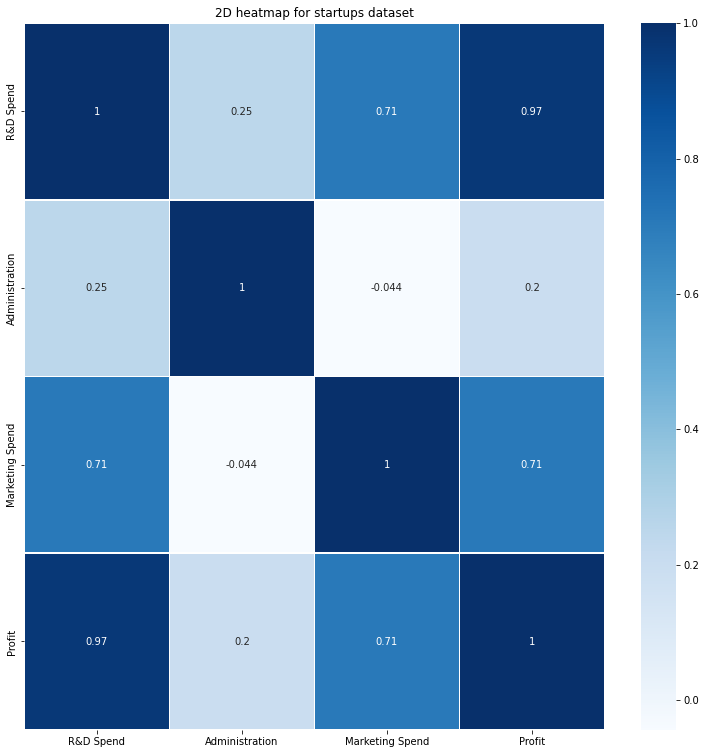

In [27]:
#plotting the heatmap for the correleation between the coloums
fig,ax=plt.subplots(figsize=(13,13))
sns.heatmap(startup_df.corr(),annot=True,ax=ax,linewidth=0.5,cmap="Blues")
plt.title("2D heatmap for startups dataset")
plt.show()

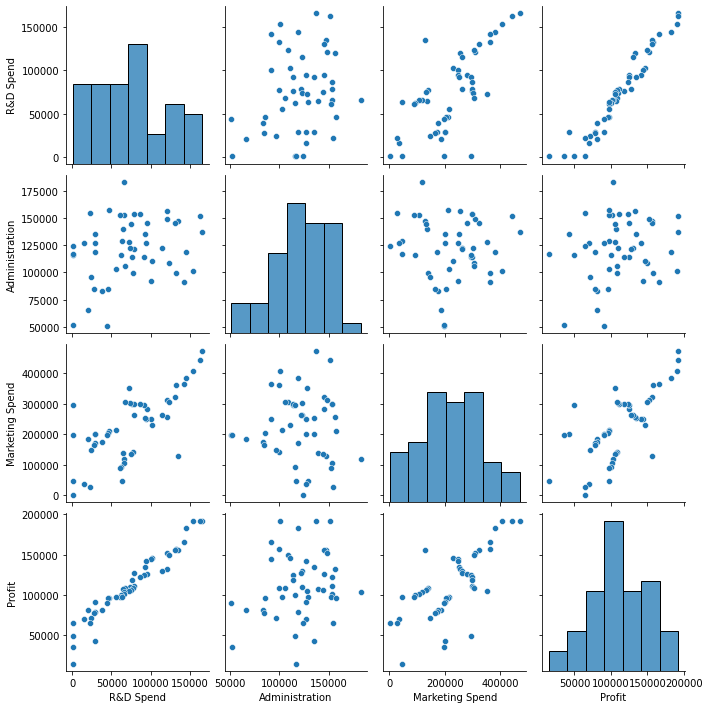

In [28]:
#plotting pairplot for all the coloumns in the dataset
sns.pairplot(start_up)
plt.show()

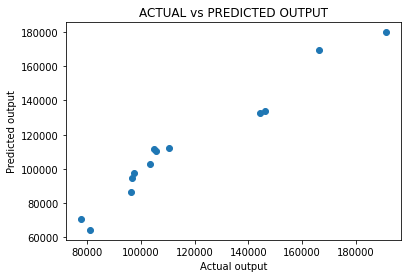

In [29]:
#scatterplot for actual output and predicted output
plt.scatter(y_test,y_pred)
plt.title("ACTUAL vs PREDICTED OUTPUT")
plt.xlabel("Actual output")
plt.ylabel("Predicted output")
plt.show()

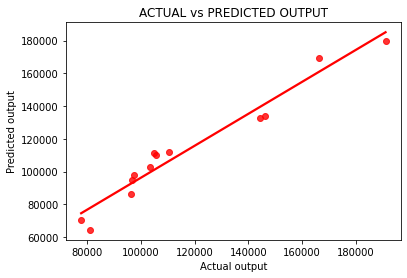

In [30]:
#plotting regressionplot actual output and predicted output 
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.title("ACTUAL vs PREDICTED OUTPUT")
plt.xlabel("Actual output")
plt.ylabel("Predicted output")
plt.show()


In [32]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('minorproject.ipynb')